# Check Umiujac FOREST forcing files

Downloaded from https://doi.pangaea.de/10.1594/PANGAEA.964743 the 27/02/2024 by Mickaël Lalande

- Article (Lackner et al., 2022) : https://tc.copernicus.org/articles/16/3357/2022/
- Données : https://doi.pangaea.de/10.1594/PANGAEA.964743 (updated by Florent)

CLASSIC forcing: https://cccma.gitlab.io/classic/basicInputs.html

Coverage:	LATITUDE: 56.559167 * LONGITUDE: -76.482056
	DATE/TIME START: 2012-09-28T04:00:00 * DATE/TIME END: 2021-10-15T21:00:00
	MINIMUM ELEVATION: 133.0 m * MAXIMUM ELEVATION: 133.0 m
Event(s):	Umiujaq_2012-2021_Tundra * LATITUDE: 56.559167 * LONGITUDE: -76.482056 * DATE/TIME START: 2012-09-28T17:00:00 * DATE/TIME END: 2021-10-19T10:00:00 * ELEVATION: 133.0 m * LOCATION: Hudson Bay * METHOD/DEVICE: Field measurement

In [1]:
# Env: sc2_v0

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures

In [2]:
path = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all/Umiujaq/Domine-etal_2024/datasets'

## Umiujaq FOREST, northeastern Canada

In [10]:
df_rad = pd.read_csv(path+'/Umiujaq_rad_forest.tab', skiprows=31, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_rad

,SWD [W/m**2],QF SWD,SWU [W/m**2],QF SWU,LWD [W/m**2],QF LWD,LWU [W/m**2],QF LWU
Date/Time,,,,,,,,
2015-11-26 08:00:00,0.000,0,0.000,0,295.638,0,285.366,0
2015-11-26 09:00:00,0.000,0,0.000,0,289.122,0,285.610,0
2015-11-26 10:00:00,0.000,0,0.000,0,281.277,0,285.919,0
2015-11-26 11:00:00,0.000,0,0.000,0,286.900,0,288.922,0
2015-11-26 12:00:00,8.706,0,6.906,1,264.778,0,287.333,0
...,...,...,...,...,...,...,...,...
2021-10-14 23:00:00,0.000,0,0.000,0,256.578,0,335.015,0
2021-10-15 00:00:00,0.000,0,0.000,0,262.389,0,333.473,0
2021-10-15 01:00:00,0.000,0,0.000,0,265.666,0,332.072,0


In [11]:
df_temp_wind = pd.read_csv(path+'/Umiujaq_temp_wind_forest.tab', skiprows=27, delimiter='\t', parse_dates=['Date/Time'], index_col=['Date/Time'])
df_temp_wind

,TTT [°C],QF air temp,ff [m/s],QF wind speed
Date/Time,,,,
2015-11-26 08:00:00,-6.742,0,0.998,0
2015-11-26 09:00:00,-6.757,0,0.710,0
2015-11-26 10:00:00,-5.931,0,1.323,0
2015-11-26 11:00:00,-5.659,0,3.764,0
2015-11-26 12:00:00,-5.585,0,4.257,0
...,...,...,...,...
2021-10-19 09:00:00,3.130,0,0.819,0
2021-10-19 10:00:00,2.121,0,0.724,0
2021-10-19 11:00:00,1.319,0,0.238,0


In [40]:
df = pd.concat([df_rad, df_temp_wind], axis=1)
df

,SWD [W/m**2],QF SWD,SWU [W/m**2],QF SWU,LWD [W/m**2],QF LWD,LWU [W/m**2],QF LWU,TTT [°C],QF air temp,ff [m/s],QF wind speed
Date/Time,,,,,,,,,,,,
2015-11-26 08:00:00,0.000,0.0,0.000,0.0,295.638,0.0,285.366,0.0,-6.742,0,0.998,0
2015-11-26 09:00:00,0.000,0.0,0.000,0.0,289.122,0.0,285.610,0.0,-6.757,0,0.710,0
2015-11-26 10:00:00,0.000,0.0,0.000,0.0,281.277,0.0,285.919,0.0,-5.931,0,1.323,0
2015-11-26 11:00:00,0.000,0.0,0.000,0.0,286.900,0.0,288.922,0.0,-5.659,0,3.764,0
2015-11-26 12:00:00,8.706,0.0,6.906,1.0,264.778,0.0,287.333,0.0,-5.585,0,4.257,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-19 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.130,0,0.819,0
2021-10-19 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.121,0,0.724,0
2021-10-19 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.319,0,0.238,0


### Convert to SnowMIP format

In [13]:
df_forcing = df.copy()

df_forcing.index.names = ['time']

df_forcing.rename(
    columns={
        'SWD [W/m**2]': 'SWdown', 
        'LWD [W/m**2]': 'LWdown', 
        'TTT [°C]': 'Tair', 
        'ff [m/s]': 'Wind'
    }, 
    inplace=True
)

df_forcing.drop(
    columns=[
        'QF air temp', 'QF LWD', 'QF SWD', 'QF LWU', 'QF SWU', 'QF wind speed',
        'SWU [W/m**2]', 'LWU [W/m**2]', 
    ], 
    inplace=True
)

df_forcing

,SWdown,LWdown,Tair,Wind
time,,,,
2015-11-26 08:00:00,0.000,295.638,-6.742,0.998
2015-11-26 09:00:00,0.000,289.122,-6.757,0.710
2015-11-26 10:00:00,0.000,281.277,-5.931,1.323
2015-11-26 11:00:00,0.000,286.900,-5.659,3.764
2015-11-26 12:00:00,8.706,264.778,-5.585,4.257
...,...,...,...,...
2021-10-19 09:00:00,NaN,NaN,3.130,0.819
2021-10-19 10:00:00,NaN,NaN,2.121,0.724
2021-10-19 11:00:00,NaN,NaN,1.319,0.238


In [14]:
ds_forcing = df_forcing.to_xarray()
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 51702)
Coordinates:
  * time     (time) datetime64[ns] 2015-11-26T08:00:00 ... 2021-10-19T13:00:00
Data variables:
    SWdown   (time) float64 0.0 0.0 0.0 0.0 8.706 11.61 ... nan nan nan nan nan
    LWdown   (time) float64 295.6 289.1 281.3 286.9 264.8 ... nan nan nan nan
    Tair     (time) float64 -6.742 -6.757 -5.931 -5.659 ... 1.319 2.147 2.937
    Wind     (time) float64 0.998 0.71 1.323 3.764 ... 0.724 0.238 0.635 1.483

In [15]:
pd.to_datetime(ds_forcing.time.values) - pd.Timedelta(hours=4)

DatetimeIndex(['2015-11-26 04:00:00', '2015-11-26 05:00:00',
               '2015-11-26 06:00:00', '2015-11-26 07:00:00',
               '2015-11-26 08:00:00', '2015-11-26 09:00:00',
               '2015-11-26 10:00:00', '2015-11-26 11:00:00',
               '2015-11-26 12:00:00', '2015-11-26 13:00:00',
               ...
               '2021-10-19 00:00:00', '2021-10-19 01:00:00',
               '2021-10-19 02:00:00', '2021-10-19 03:00:00',
               '2021-10-19 04:00:00', '2021-10-19 05:00:00',
               '2021-10-19 06:00:00', '2021-10-19 07:00:00',
               '2021-10-19 08:00:00', '2021-10-19 09:00:00'],
              dtype='datetime64[ns]', length=51702, freq=None)

In [16]:
# Convert the Florent dataset back to local time
# ds_forcing['time'] = pd.to_datetime(ds_forcing.time.values).tz_localize('UTC').tz_convert('America/Toronto').tz_localize(None)
ds_forcing['time'] = pd.to_datetime(ds_forcing.time.values) - pd.Timedelta(hours=4) # to avoid the day light savings adjustment
ds_forcing

<xarray.Dataset>
Dimensions:  (time: 51702)
Coordinates:
  * time     (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-19T09:00:00
Data variables:
    SWdown   (time) float64 0.0 0.0 0.0 0.0 8.706 11.61 ... nan nan nan nan nan
    LWdown   (time) float64 295.6 289.1 281.3 286.9 264.8 ... nan nan nan nan
    Tair     (time) float64 -6.742 -6.757 -5.931 -5.659 ... 1.319 2.147 2.937
    Wind     (time) float64 0.998 0.71 1.323 3.764 ... 0.724 0.238 0.635 1.483

In [17]:
path_SnowMIP = '/home/lalandmi/Dropbox/data/ESM-SnowMIP_all' # menard
ds_forcing_ex = xr.open_dataset(path_SnowMIP+'/met_insitu_sap_2005_2015.nc')
ds_forcing_ex

<xarray.Dataset>
Dimensions:  (time: 87648)
Coordinates:
  * time     (time) datetime64[ns] 2005-10-01T01:00:00 ... 2015-10-01
Data variables:
    LWdown   (time) float32 ...
    Psurf    (time) float32 ...
    Qair     (time) float32 ...
    Rainf    (time) float32 ...
    Snowf    (time) float32 ...
    SWdown   (time) float32 ...
    Tair     (time) float32 ...
    Wind     (time) float32 ...

In [18]:
# Set the variables attributes as in SnowMIP
for var in ['SWdown', 'LWdown', 'Tair', 'Wind']:
    ds_forcing[var].attrs = ds_forcing_ex[var].attrs

# Only modify the temperature unit already prepared for CLASSIC inputs
ds_forcing['Tair'].attrs['units'] = '°C'

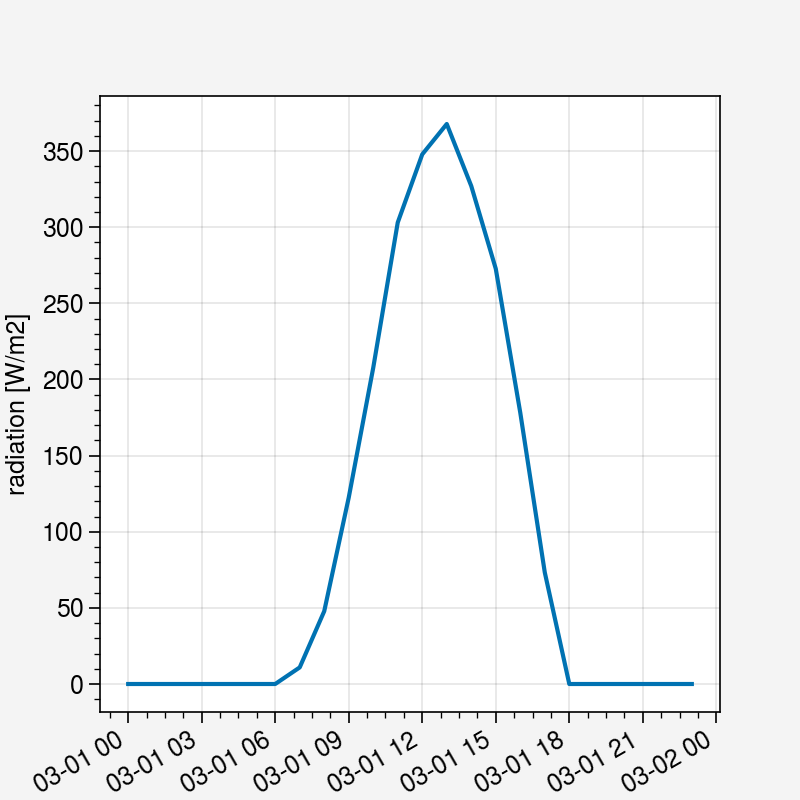

In [19]:
# Local time?
%matplotlib inline
ds_forcing.SWdown.sel(time='2016-03-01').plot()

Text(0.5, 0.98, 'Umiujaq FOREST, northeastern Canada')

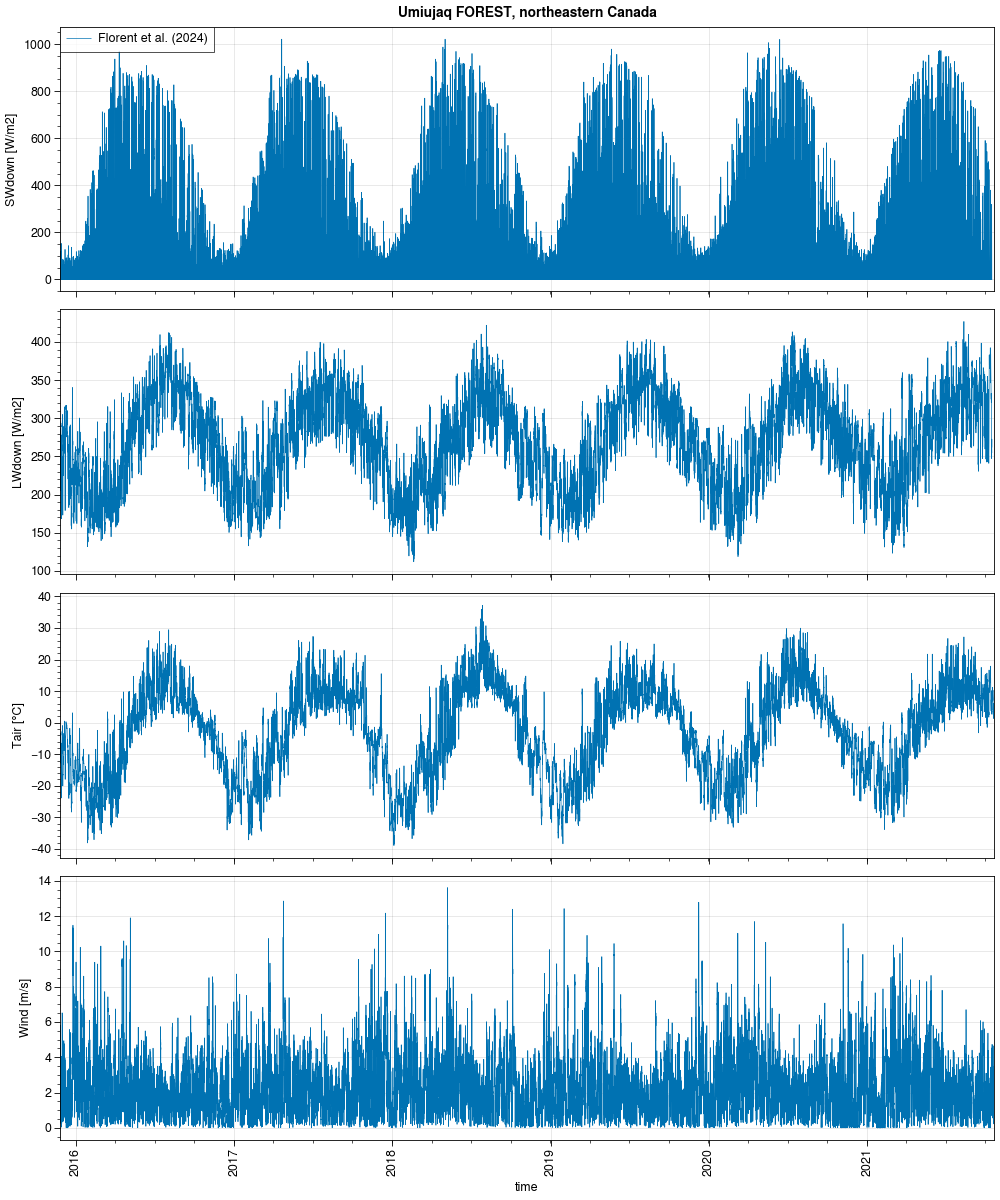

In [21]:
%matplotlib widget
fig, axs = pplt.subplots(nrows=len(list(ds_forcing.keys())), figsize=(10,12), sharey=0)

lw = 0.5

for i, var in enumerate(list(ds_forcing.keys())):
    ax = axs[i]
    ax.plot(ds_forcing[var], lw=lw, label='Florent et al. (2024)')
    # ax.plot(ds_forcing2[var], lw=lw, label='Lackner et al. (2022)')
    ax.format(ylabel=var + ' ['+ds_forcing[var].units+']')

axs[0].legend(loc='ul')

fig.suptitle('Umiujaq FOREST, northeastern Canada')

## Merge with TUNDRA site for missing variables

In [30]:
ds_forcing_tundra = xr.open_dataset(path+'/met_insitu_umt_2012_2021.nc')
ds_forcing_tundra = ds_forcing_tundra.drop(list(ds_forcing.keys()))
ds_forcing_tundra = ds_forcing_tundra.sel(time=slice(ds_forcing.time[0], ds_forcing.time[-1]))
ds_forcing_tundra

<xarray.Dataset>
Dimensions:    (time: 51702)
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-19T09:00:00
Data variables:
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...

In [33]:
ds_forcing = ds_forcing.merge(ds_forcing_tundra)

In [34]:
ds_forcing

<xarray.Dataset>
Dimensions:    (time: 51702)
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-19T09:00:00
Data variables:
    SWdown     (time) float64 0.0 0.0 0.0 0.0 8.706 ... nan nan nan nan nan
    LWdown     (time) float64 295.6 289.1 281.3 286.9 264.8 ... nan nan nan nan
    Tair       (time) float64 -6.742 -6.757 -5.931 -5.659 ... 1.319 2.147 2.937
    Wind       (time) float64 0.998 0.71 1.323 3.764 ... 0.724 0.238 0.635 1.483
    Rainf      (time) float64 ...
    Snowf      (time) float64 ...
    TotPrecip  (time) float64 ...
    Psurf      (time) float64 ...
    Qair       (time) float64 ...

## Remove all Nan values

In [62]:
ds_forcing = ds_forcing.isel(time=slice(0, -106)).load()

In [66]:
ds_forcing.isnull().sum()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    SWdown     int64 0
    LWdown     int64 0
    Tair       int64 0
    Wind       int64 0
    Rainf      int64 0
    Snowf      int64 0
    TotPrecip  int64 0
    Psurf      int64 0
    Qair       int64 0

## Save

In [67]:
ds_forcing.to_netcdf(path+'/met_insitu_umf_2015_2021.nc')
ds_forcing

<xarray.Dataset>
Dimensions:    (time: 51596)
Coordinates:
  * time       (time) datetime64[ns] 2015-11-26T04:00:00 ... 2021-10-14T23:00:00
Data variables:
    SWdown     (time) float64 0.0 0.0 0.0 0.0 8.706 ... 0.0 0.0 0.0 0.0 0.0
    LWdown     (time) float64 295.6 289.1 281.3 286.9 ... 265.7 272.6 262.2
    Tair       (time) float64 -6.742 -6.757 -5.931 -5.659 ... 4.493 4.286 3.714
    Wind       (time) float64 0.998 0.71 1.323 3.764 ... 4.412 4.174 4.404 4.492
    Rainf      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Snowf      (time) float64 0.0001024 6.425e-05 3.589e-05 ... 0.0 0.0 0.0
    TotPrecip  (time) float64 0.0001024 6.425e-05 3.589e-05 ... 0.0 0.0 0.0
    Psurf      (time) float64 9.88e+04 9.889e+04 ... 9.97e+04 9.965e+04
    Qair       (time) float64 0.001974 0.001984 0.002121 ... 0.004245 0.004091